In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [2]:
iris = datasets.load_iris()

In [3]:
type( iris )

sklearn.utils.Bunch

In [4]:
for key in iris.keys():
    print( key )

data
target
frame
target_names
DESCR
feature_names
filename


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.target.size

150

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target.size

150

In [9]:
X = iris.data[50:150, 2: 4] # we only take the first two features of two target (eliminate the 'setosa')
X.size

200

In [10]:
Y = iris.target[50:150]

In [11]:
model = LogisticRegression()

In [12]:
model.fit( X, Y )

LogisticRegression()

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

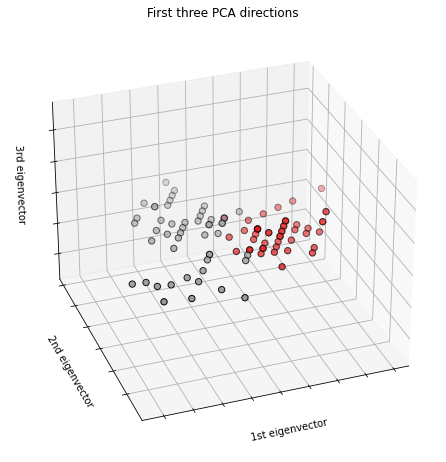

In [14]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=2).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1],  c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [15]:
#Gradient descent
# create the linear model classifier
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
clf = SGDClassifier()


In [16]:
#scaling, each feature will have a zero average, with a standard deviation of one.
scaler = StandardScaler().fit(X)
X= scaler.transform(X)

In [17]:
X.shape

(100, 2)

In [18]:
# fit (train) the classifier
clf.fit(X, Y)

SGDClassifier()

In [19]:
# print learned coeficients
print (clf.coef_)
print (clf.intercept_)

[[15.76352537 11.14106487]]
[0.66721066]


In [20]:
clf.intercept_.shape 

(1,)

In [21]:
clf.coef_.shape 

(1, 2)

In [22]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5)
print(x_min,x_max)
print(y_min,y_max)
print(xs.shape)

-2.820314982238903 2.9274439006213906
-2.0994725483170327 2.4496529287178
(12,)


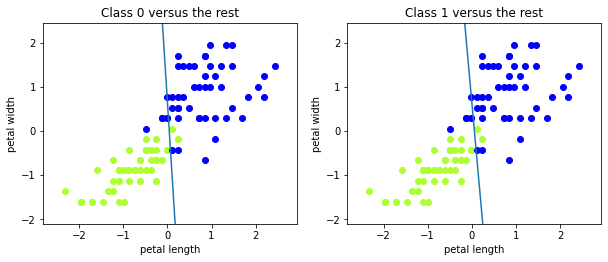

In [23]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(10,6)
colors = ['red', 'greenyellow', 'blue']
for i in [0,1]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class ' + str(i) + ' versus the rest')
    axes[i].set_xlabel('petal length')
    axes[i].set_ylabel('petal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    for j in [1,2]:
        px = X[:, 0][Y == j]
        py = X[:, 1][Y == j]
        plt.scatter(px, py, c=colors[j])
    ys = clf.intercept_[0]-xs*clf.coef_[0,i]
    plt.plot(xs,ys)